<a href="https://colab.research.google.com/github/kacperkurowski/CE888/blob/master/Lab%202/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 2

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np


In [0]:
# Load the data 
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv') 
data = df.values.T[1]

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

def boostrap_mean(sample, sample_size, n_iterations):
  sample_means = np.array([])
  for i in range(n_iterations):
    sample_data = np.random.choice(sample,sample_size)
    sample_mean= np.mean(sample_data)
    sample_means=np.append(sample_means,[sample_mean])
  
  data_mean = np.mean(sample_means)
  sample_means = np.sort(sample_means)
  lower = sample_means[0]
  upper = sample_means[n_iterations-1]
  
  return data_mean, lower, upper


In [0]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 40000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])


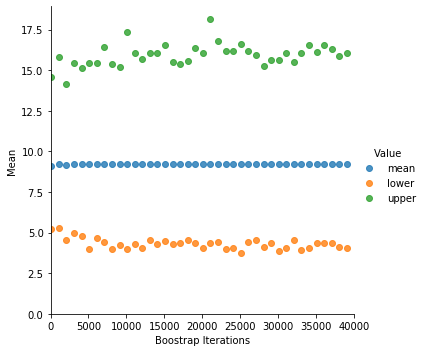

In [6]:
df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 40000)

sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')


In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
  sample_means = np.array([])
  for i in range(iterations):
    sample_data = np.random.choice(sample,sample_size)
    sample_mean= np.mean(sample_data)
    sample_means=np.append(sample_means,[sample_mean])

  sample_means = np.sort(sample_means)
  cl=int(((1-ci/100)*iterations)/2)
  sample_means=sample_means[cl:-cl]
  data_mean = np.mean(sample_means)
  lower = sample_means[0]
  upper = sample_means[sample_means.size-1]
  return data_mean, lower, upper


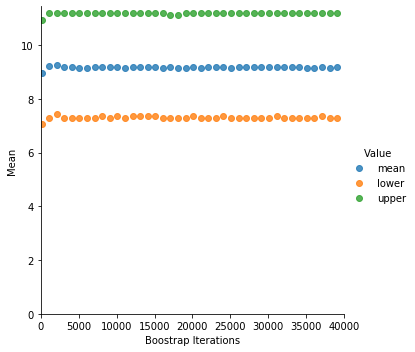

In [8]:
boots = []
for i in range(100, 40000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 40000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


##Vehicle Data

In [10]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
currentfleet = df.values.T[0]
newfleet=df.values.T[1]
newfleet=newfleet[~np.isnan(newfleet)]

print("\n")
print(currentfleet)
print("\n")
print(newfleet)




[18. 15. 18. 16. 17. 15. 14. 14. 14. 15. 15. 14. 15. 14. 22. 18. 21. 21.
 10. 10. 11.  9. 28. 25. 19. 16. 17. 19. 18. 14. 14. 14. 14. 12. 13. 13.
 18. 22. 19. 18. 23. 26. 25. 20. 21. 13. 14. 15. 14. 17. 11. 13. 12. 13.
 15. 13. 13. 14. 22. 28. 13. 14. 13. 14. 15. 12. 13. 13. 14. 13. 12. 13.
 18. 16. 18. 18. 23. 11. 12. 13. 12. 18. 21. 19. 21. 15. 16. 15. 11. 20.
 21. 19. 15. 26. 25. 16. 16. 18. 16. 13. 14. 14. 14. 28. 19. 18. 15. 15.
 16. 15. 16. 14. 17. 16. 15. 18. 21. 20. 13. 23. 20. 23. 18. 19. 25. 26.
 18. 16. 16. 15. 22. 22. 24. 23. 29. 25. 20. 18. 19. 18. 27. 13. 17. 13.
 13. 13. 30. 26. 18. 17. 16. 15. 18. 21. 19. 19. 16. 16. 16. 16. 25. 26.
 31. 34. 36. 20. 19. 20. 19. 21. 20. 25. 21. 19. 21. 21. 19. 18. 19. 18.
 18. 18. 30. 31. 23. 24. 22. 20. 22. 20. 21. 17. 18. 17. 18. 17. 16. 19.
 19. 36. 27. 23. 24. 34. 35. 28. 29. 27. 34. 32. 28. 26. 24. 19. 28. 24.
 27. 27. 26. 24. 30. 39. 35. 34. 30. 22. 27. 20. 18. 28. 27. 34. 31. 29.
 27. 24. 23. 38. 36. 25. 38. 26. 22. 36. 27. 27. 

##Current/New Fleet Histogram

(0, 40)

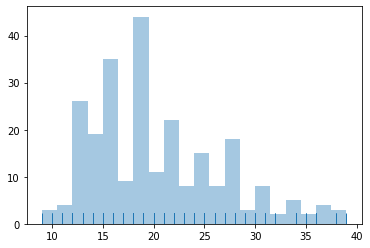

In [14]:
df_data = pd.DataFrame(currentfleet,columns=["CurrentFleet"])
sns.distplot(df_data,bins=20,kde=False, rug=True)
sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 40)


(0, 40)

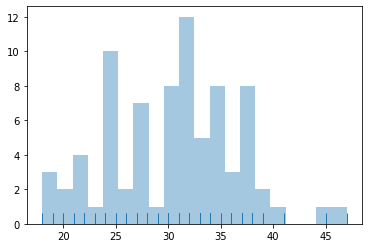

In [15]:
df_data = pd.DataFrame(newfleet,columns=['newFleet']) 
sns.distplot(df_data,bins=20,kde=False, rug=True) 
sns_plot.axes[0, 0].set_ylim(0,) 
sns_plot.axes[0, 0].set_xlim(0, 40)

##Scatter Plots

     Current Fleet  Current Fleet Car ID
0             18.0                     0
1             15.0                     1
2             18.0                     2
3             16.0                     3
4             17.0                     4
..             ...                   ...
244           27.0                   244
245           27.0                   245
246           32.0                   246
247           28.0                   247
248           31.0                   248

[249 rows x 2 columns]
    New Fleet  New Fleet Car ID
0        24.0                 0
1        27.0                 1
2        27.0                 2
3        25.0                 3
4        31.0                 4
..        ...               ...
74       34.0                74
75       38.0                75
76       32.0                76
77       38.0                77
78       32.0                78

[79 rows x 2 columns]


(0, 80)

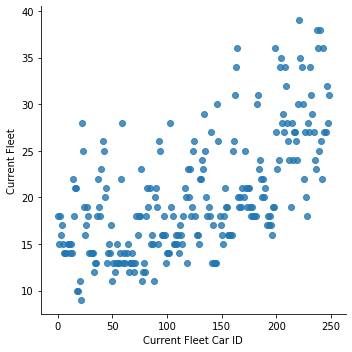

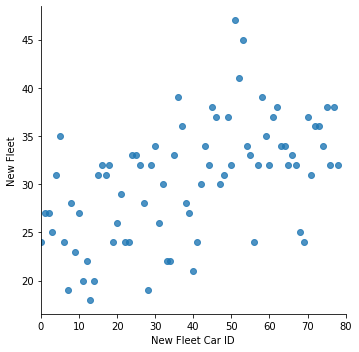

In [16]:
id_cf=np.array(range(len(currentfleet)))
id_nf=np.array(range(len(newfleet)))

currentfleet_data = pd.DataFrame(currentfleet, columns=['Current Fleet'])
currentfleet_data["Current Fleet Car ID"]=id_cf
sns_plot = sns.lmplot( currentfleet_data.columns[1],currentfleet_data.columns[0], data=currentfleet_data, fit_reg=False)
print(currentfleet_data)
newfleet_data = pd.DataFrame(newfleet, columns=['New Fleet'])
newfleet_data["New Fleet Car ID"]=id_nf
sns_plot1 = sns.lmplot( newfleet_data.columns[1],newfleet_data.columns[0], data=newfleet_data, fit_reg=False)
print(newfleet_data)
#sns_plot1.axes[0, 0].set_ylim(0,)
sns_plot1.axes[0, 0].set_xlim(0, 80)


##Comparing the Data

Mean of Current and New Fleets
Current Mean 20.14457831325301
New Mean 30.481012658227847


Old Fleet
BS Mean 20.158550200803212
BS Lower 18.847389558232933
BS Upper 21.449799196787147


New Fleet
BS Mean 30.478405063291138
BS Lower 28.531645569620252
BS Upper 32.379746835443036




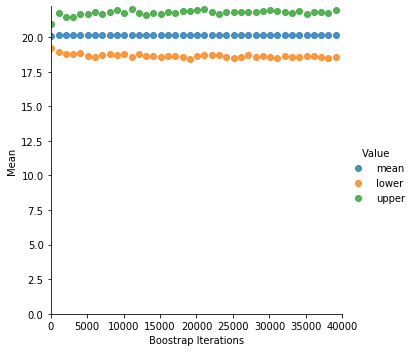

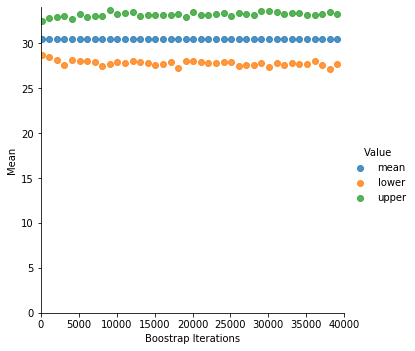

In [18]:
print('Mean of Current and New Fleets')
mean_current= np.mean(currentfleet)
mean_new=np.mean(newfleet)
print('Current Mean', mean_current)
print('New Mean', mean_new)
print('\n')
print('Old Fleet')
bootstrap_current=boostrap_mean(currentfleet,currentfleet.shape[0],1000) 

print('BS Mean', bootstrap_current[0])

print('BS Lower', bootstrap_current[1])

print('BS Upper', bootstrap_current[2])
print('\n')
print('New Fleet')
bootstrap_new= boostrap_mean(newfleet,newfleet.shape[0],1000)

print('BS Mean', bootstrap_new[0])

print('BS Lower', bootstrap_new[1])

print('BS Upper', bootstrap_new[2])

print('\n')

bootscurrent = []
bootsnew=[]
for i in range(100, 40000, 1000):
    bootcurrent = boostrap_mean(currentfleet, currentfleet.shape[0], i)
    bootnew = boostrap_mean(newfleet, newfleet.shape[0], i)
    bootscurrent.append([i, bootcurrent[0], "mean"])
    bootsnew.append([i, bootnew[0], "mean"])
    bootscurrent.append([i, bootcurrent[1], "lower"])
    bootsnew.append([i, bootnew[1], "lower"])
    bootscurrent.append([i, bootcurrent[2], "upper"])
    bootsnew.append([i, bootnew[2], "upper"])


df_bootcurrent = pd.DataFrame(bootscurrent, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot3 = sns.lmplot(df_bootcurrent.columns[0], df_bootcurrent.columns[1], data=df_bootcurrent, fit_reg=False, hue="Value")

df_bootnew = pd.DataFrame(bootsnew, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot4 = sns.lmplot(df_bootnew.columns[0], df_bootnew.columns[1], data=df_bootnew, fit_reg=False, hue="Value")

sns_plot3.axes[0, 0].set_ylim(0,)
sns_plot3.axes[0, 0].set_xlim(0, 40000)
sns_plot4.axes[0, 0].set_ylim(0,)
sns_plot4.axes[0, 0].set_xlim(0, 40000)

sns_plot3.savefig("bootstrap_confidence.png", bbox_inches='tight')
sns_plot3.savefig("bootstrap_confidence.pdf", bbox_inches='tight')
sns_plot4.savefig("bootstrap_confidence.png", bbox_inches='tight')
sns_plot4.savefig("bootstrap_confidence.pdf", bbox_inches='tight')


In [20]:
sample_datacurrent = np.random.choice(currentfleet,len(newfleet))

tobs=mean_new-mean_current

print('Observed Value', tobs)

concat=np.concatenate((currentfleet, newfleet))

print(concat)

for i in range(400000):  
  perm=np.random.permutation(concat)
  pold=perm[:int(len(perm)/2)]
  pnew=perm[int(len(perm)/2):]

  tperm= np.mean(pnew) - np.mean(pold)
  count=0
  if(tperm>tobs):
    count+=1
  Pvalue=count/400000

print('Pvalue', Pvalue)


Observed Value 10.336434344974837
[18. 15. 18. 16. 17. 15. 14. 14. 14. 15. 15. 14. 15. 14. 22. 18. 21. 21.
 10. 10. 11.  9. 28. 25. 19. 16. 17. 19. 18. 14. 14. 14. 14. 12. 13. 13.
 18. 22. 19. 18. 23. 26. 25. 20. 21. 13. 14. 15. 14. 17. 11. 13. 12. 13.
 15. 13. 13. 14. 22. 28. 13. 14. 13. 14. 15. 12. 13. 13. 14. 13. 12. 13.
 18. 16. 18. 18. 23. 11. 12. 13. 12. 18. 21. 19. 21. 15. 16. 15. 11. 20.
 21. 19. 15. 26. 25. 16. 16. 18. 16. 13. 14. 14. 14. 28. 19. 18. 15. 15.
 16. 15. 16. 14. 17. 16. 15. 18. 21. 20. 13. 23. 20. 23. 18. 19. 25. 26.
 18. 16. 16. 15. 22. 22. 24. 23. 29. 25. 20. 18. 19. 18. 27. 13. 17. 13.
 13. 13. 30. 26. 18. 17. 16. 15. 18. 21. 19. 19. 16. 16. 16. 16. 25. 26.
 31. 34. 36. 20. 19. 20. 19. 21. 20. 25. 21. 19. 21. 21. 19. 18. 19. 18.
 18. 18. 30. 31. 23. 24. 22. 20. 22. 20. 21. 17. 18. 17. 18. 17. 16. 19.
 19. 36. 27. 23. 24. 34. 35. 28. 29. 27. 34. 32. 28. 26. 24. 19. 28. 24.
 27. 27. 26. 24. 30. 39. 35. 34. 30. 22. 27. 20. 18. 28. 27. 34. 31. 29.
 27. 24. 23. 38. 

The tests show that the proposed fleet is not comparable to the current fleet and is neither better nor worse.